In [47]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [48]:
origin=load_data('apple_quality')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/kaggle/apple_quality.xlsx
[desc] 이 데이터 세트는 다양한 과일 속성에 대한 정보를 담고 있어 과일의 특성을 파악하는 데 도움이 됩니다. 데이터 세트에는 과일 ID, 크기, 무게, 당도, 아삭함, 과즙량, 숙성도, 산도 및 품질과 같은 세부 정보가 포함되어 있습니다. (출처: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

field        description
-----------  ----------------------------------
A_id         각 과일에 대한 고유 식별자
Size         크기
Weight       무게
Sweetness    단맛 정도
Crunchiness  과일의 아삭한 식감을 나타내는 질감
Juiciness    과일의 과즙 함량 정도
Ripeness     과일이 익은 정도
Acidity      과일의 산도 수준
Quality      과일의 전반적인 품질


===== 데이터 크기 확인 =====
데이터셋 크기 : (4000, 9)
행 개수 : 4000개
열 개수 : 9개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4  

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [49]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

>크기, 무게 등에서 음수값이 나오는 것을 보아 **이미 로그처리 된 데이터일 가능성이 높음**

## 🎯미션1. 데이터의 신뢰성 검사 및 전처리

In [50]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [51]:
df=origin.set_index('A_id')

In [52]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [53]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [54]:
# 중복행 검사
df.duplicated().sum()

np.int64(0)

In [55]:
# df['Quality']=np.where(df['Quality']=='good',1,0)
# df['Quality'].head()

## 🎯미션2. Quality 변수의 시각화

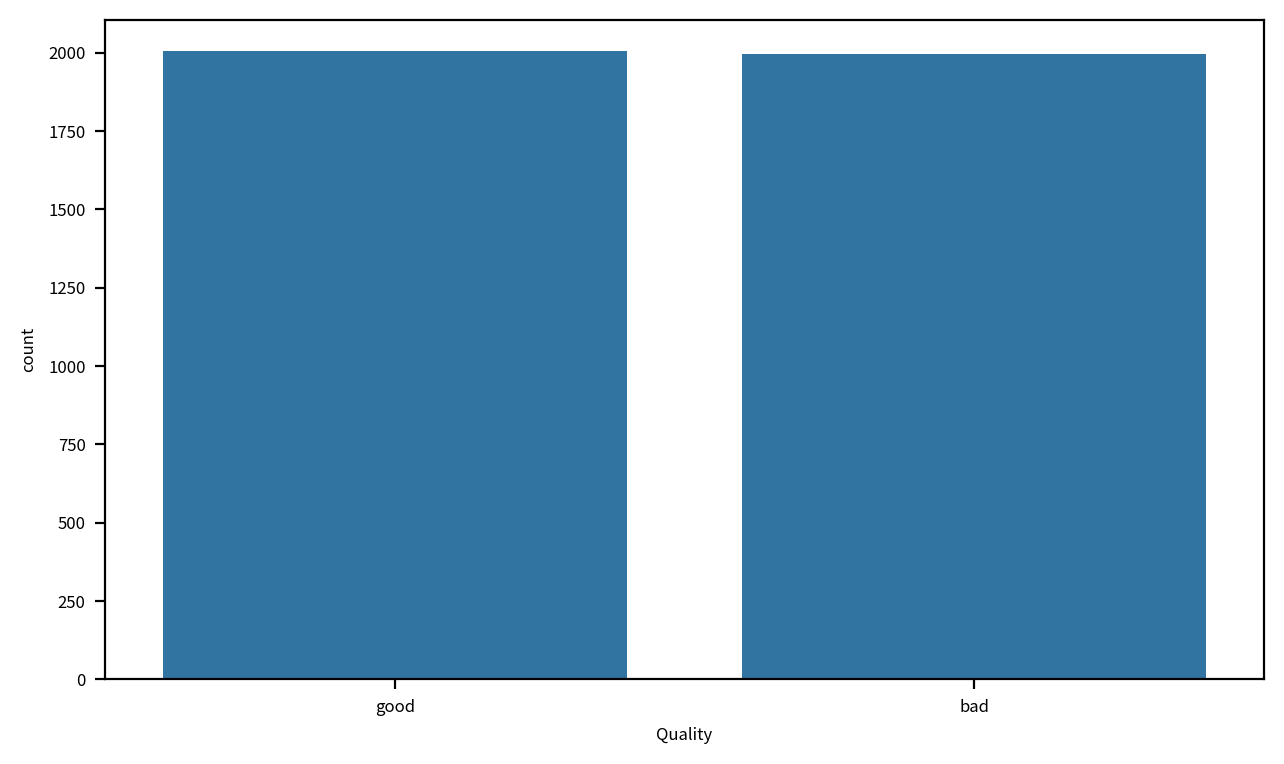

In [56]:
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.countplot(data=df, x='Quality')

plt.tight_layout()
plt.show()
plt.close()

In [57]:
print('Quality가 %s인 사과의 비율 : %0.3f'%('good',origin[origin['Quality']=='good']['Quality'].count()/len(origin['Quality'])))
print('Quality가 %s인 사과의 비율 : %0.3f'%('bad',origin[origin['Quality']=='bad']['Quality'].count()/len(origin['Quality'])))

Quality가 good인 사과의 비율 : 0.501
Quality가 bad인 사과의 비율 : 0.499


Quality는 good과 bad가 고르게 분포하고 있다.

## 🎯미션3. 연속형 변수들의 시각화

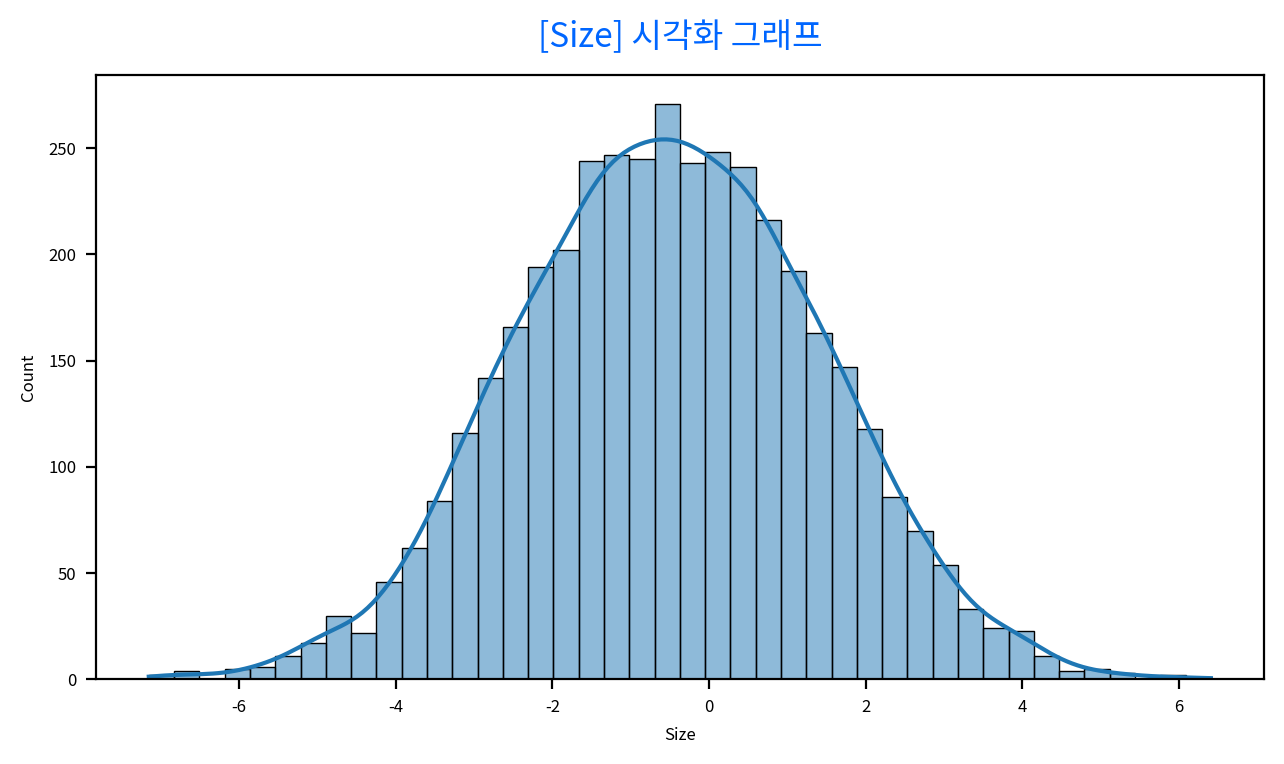

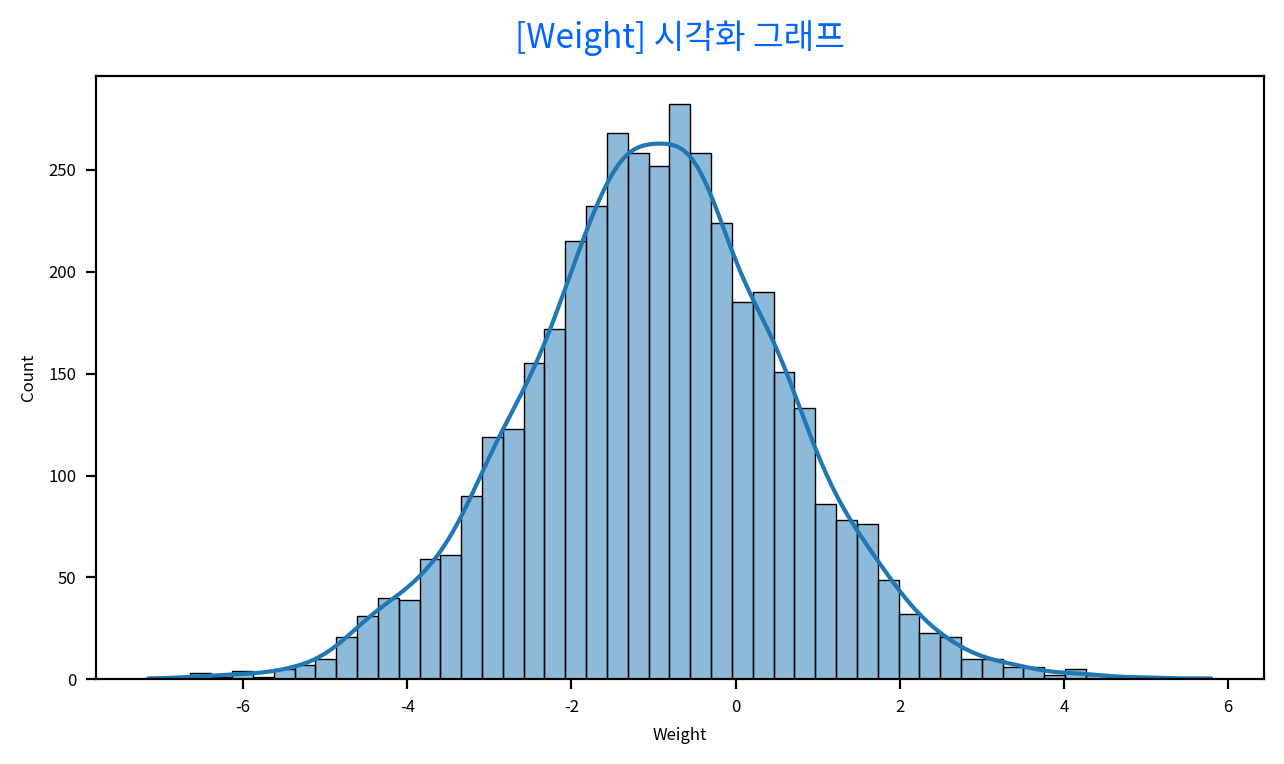

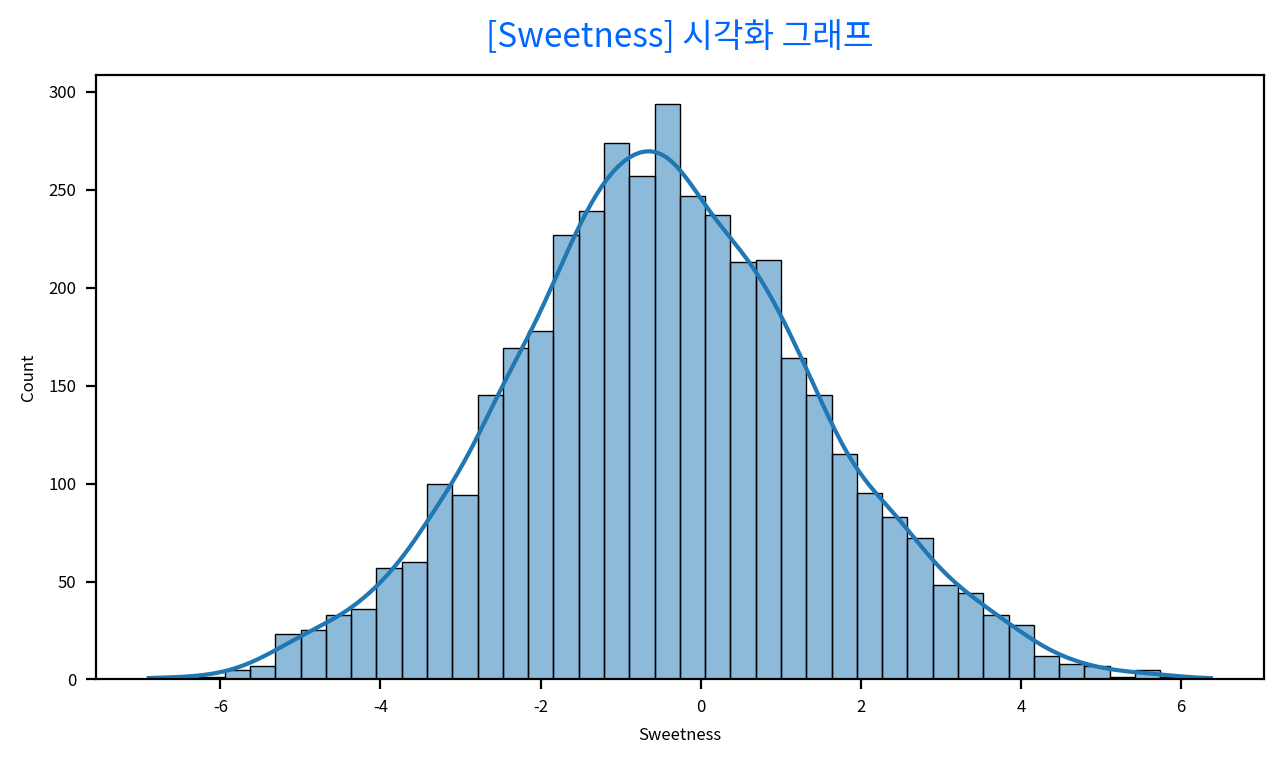

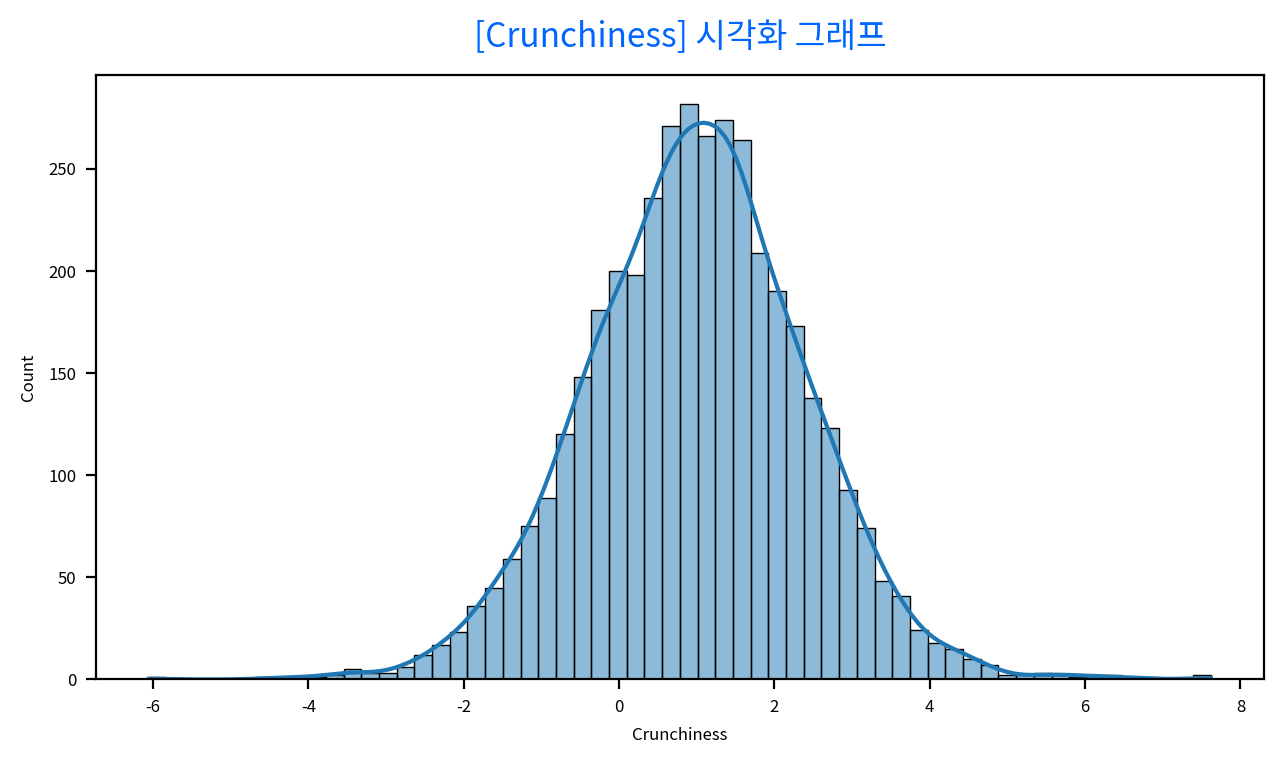

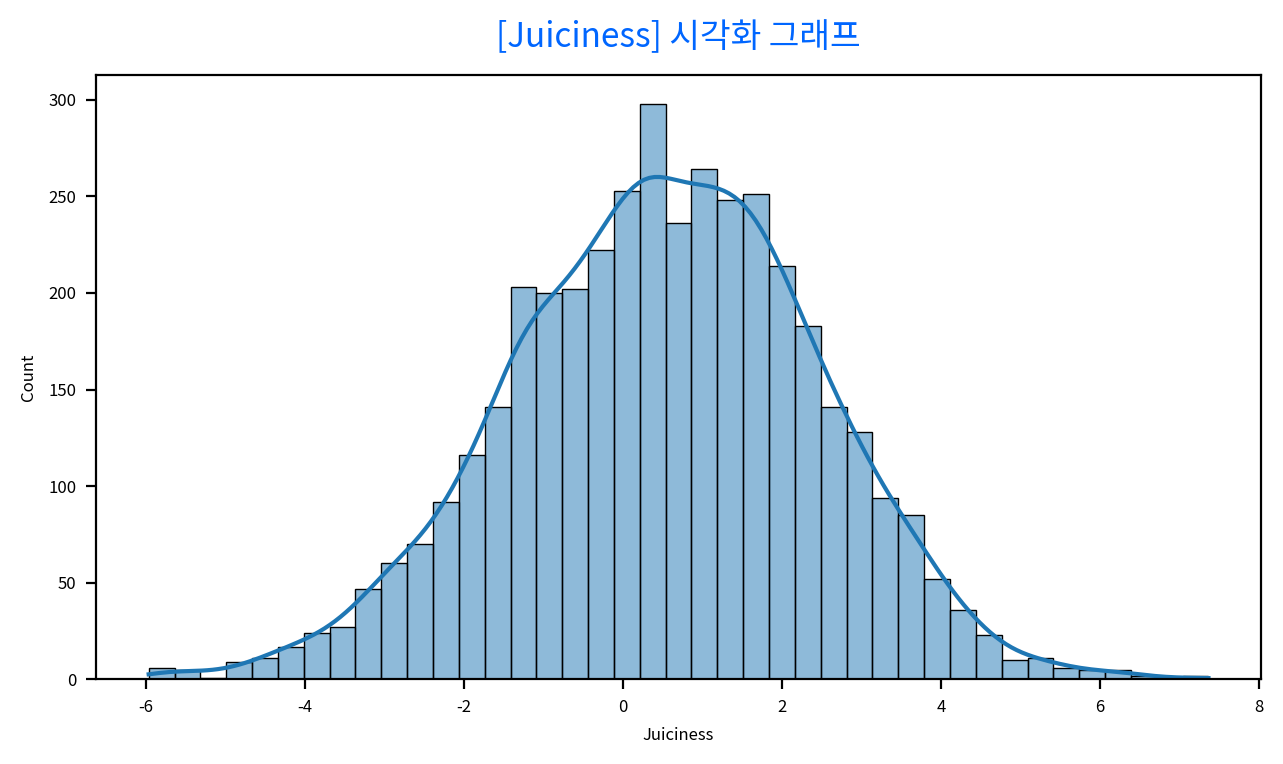

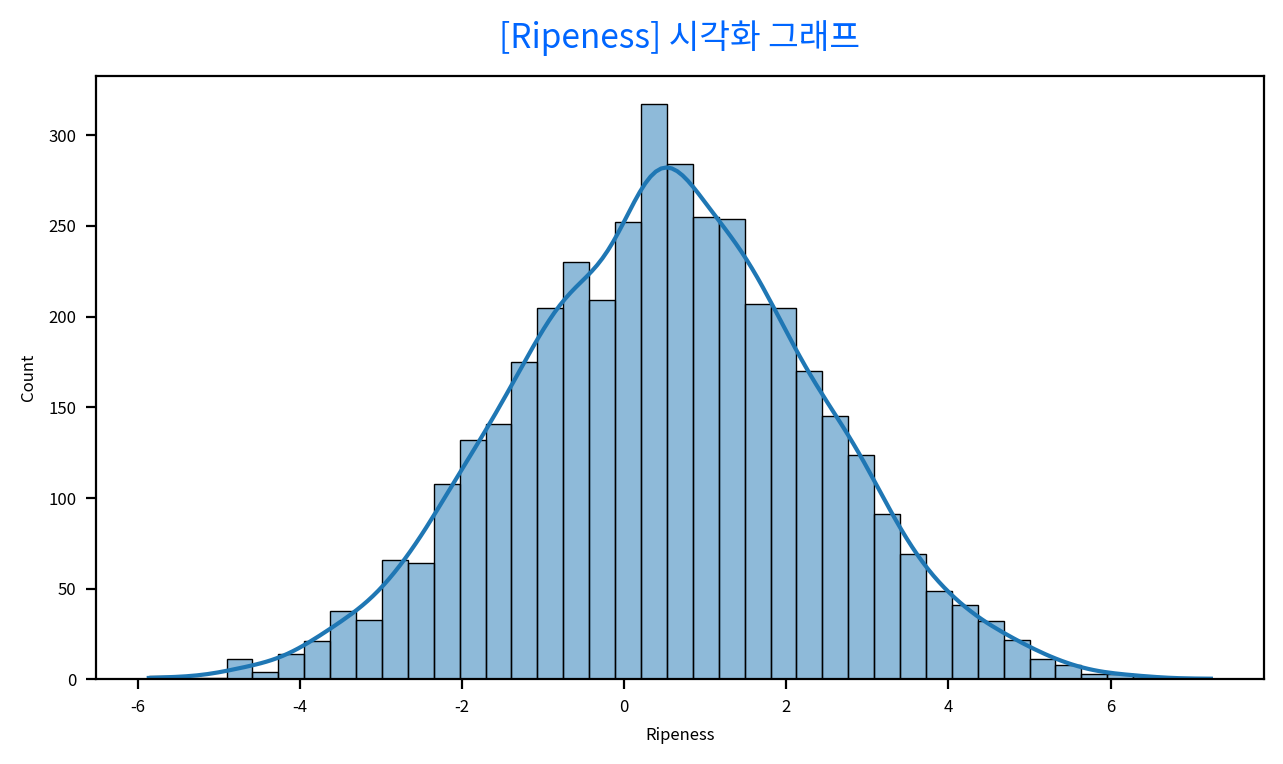

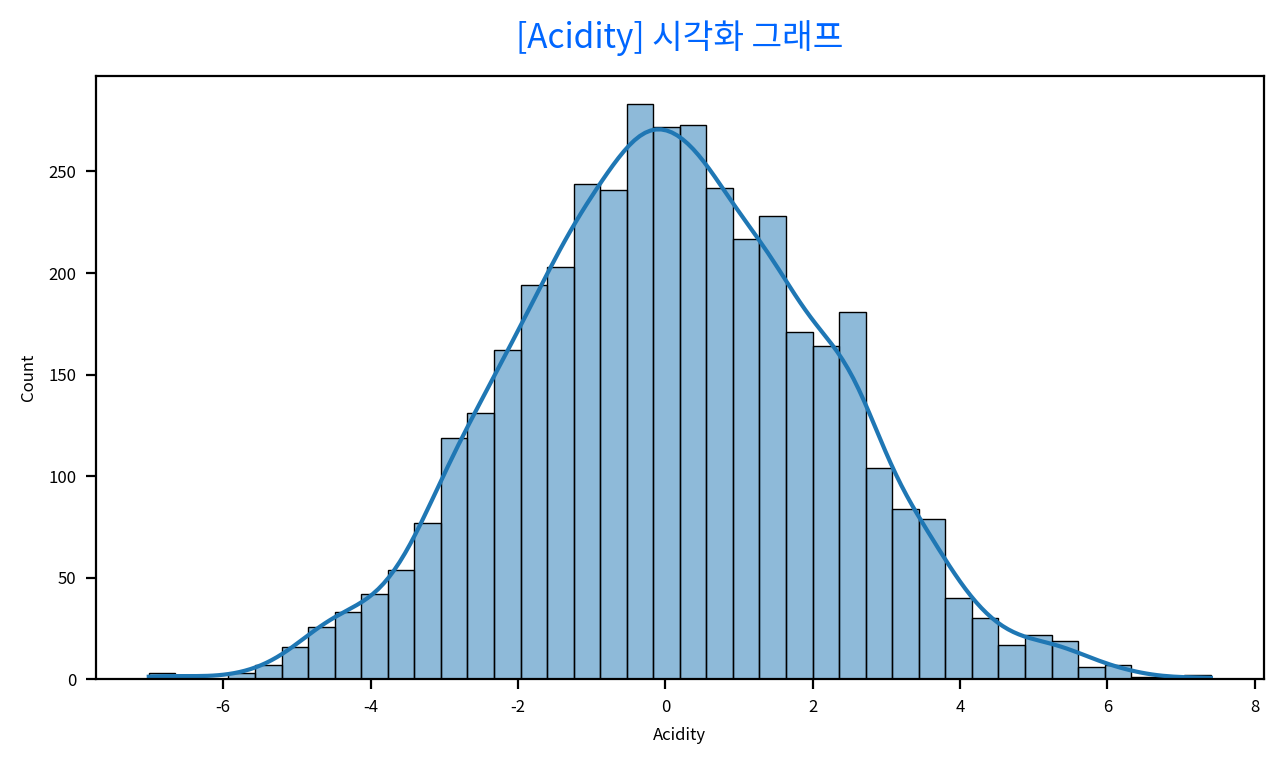

In [58]:
my_list=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

for i in my_list:
    width_px=1280
    height_px=760
    rows=1
    cols=1
    figsize=(width_px/my_dpi, height_px/my_dpi)
    fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    sb.histplot(data=df, x=i, edgecolor='#000000', linewidth=0.5, kde=True)

    ax.set_title(f'[{i}] 시각화 그래프', color='#0066ff', fontsize=12, fontweight=1000, pad=10)

    plt.tight_layout()
    plt.show()
    plt.close()

각 변수들은 종 모형의 그래프를 가지고 있고, 이는 정규성을 만족한다는 것을 의미한다.  
왜도나 눈에 띄는 이상치는 존재하지 않는다.

## 🎯미션4. 품질에 따른 연속형 변수들의 boxplot

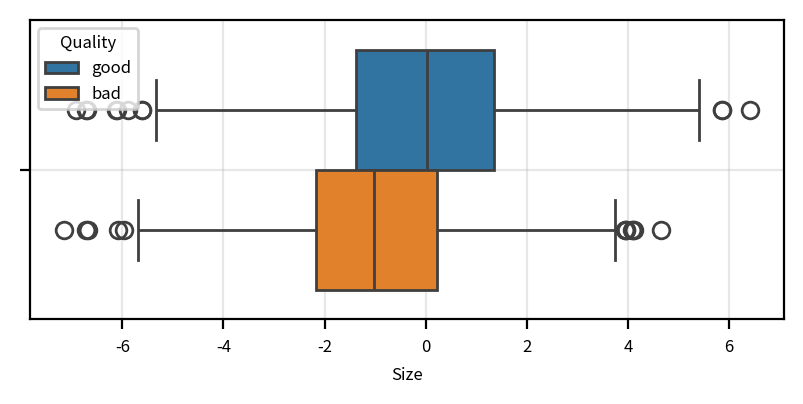

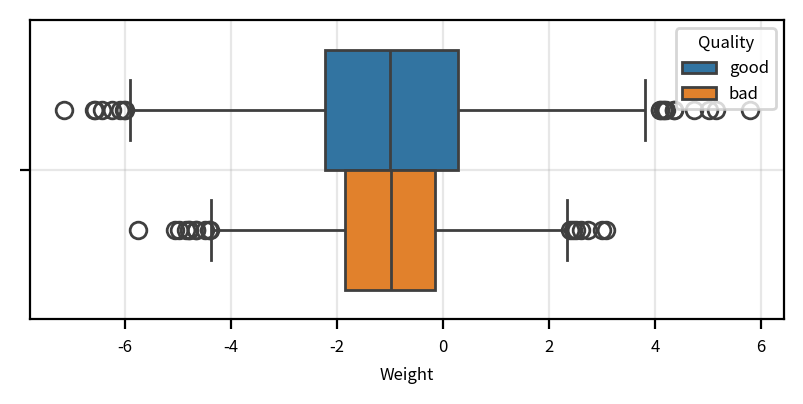

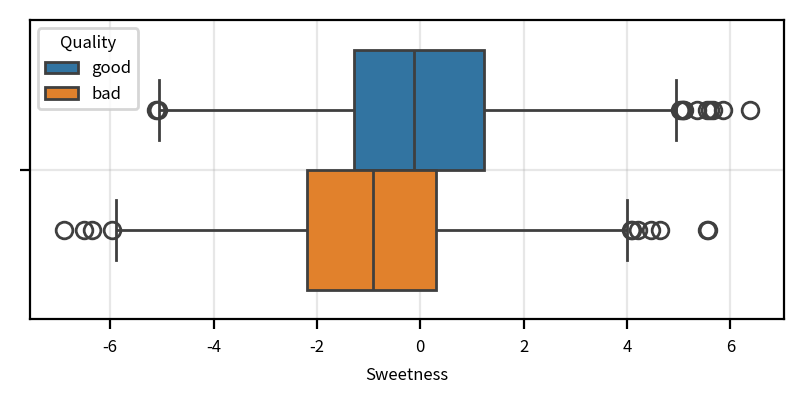

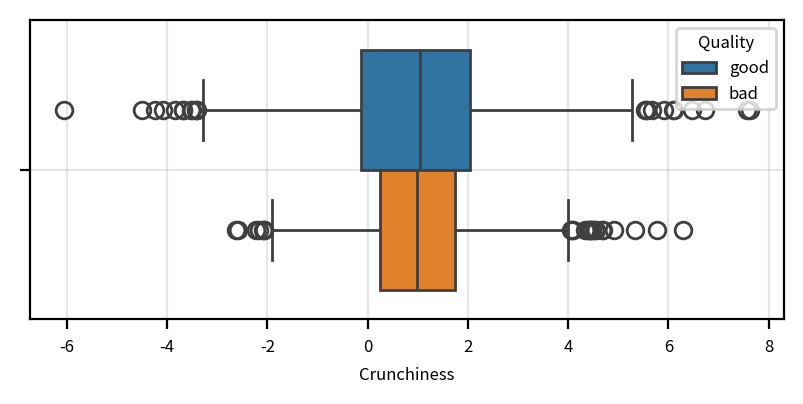

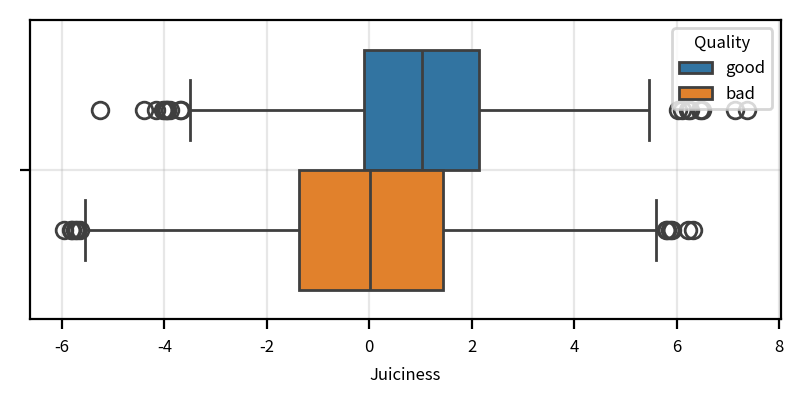

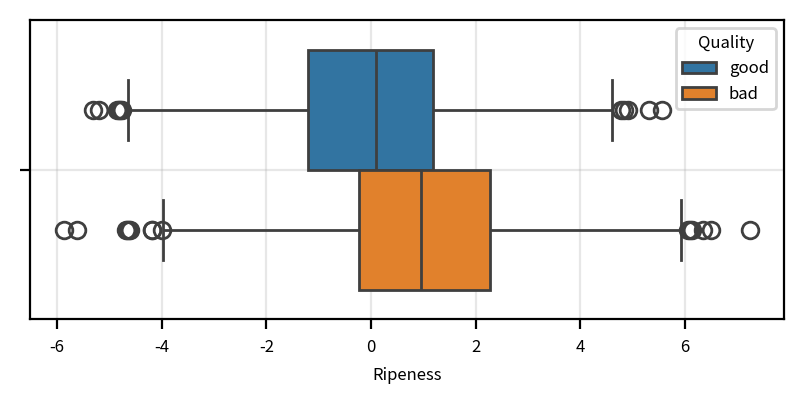

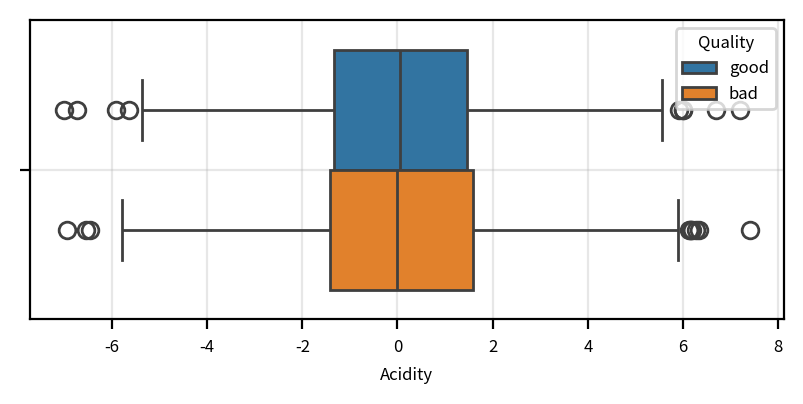

In [59]:
my_list=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
for i in my_list:
    width_px=800
    height_px=400
    rows=1
    cols=1
    figsize=(width_px/my_dpi, height_px/my_dpi)
    fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    sb.boxplot(data=df, x=i, hue='Quality')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    plt.close()

- 중앙값 차이가 분명한 변수
    - good Quality가 더 큼 : Size, Sweetness, Juiciness
    - bad Quality가 더 큼 : Ripeness
- 분포가 크게 겹치는 변수
    - Weight, Crunchiness, Acidity

이 분석에서는 중앙값 차이가 분명한 변수들을 중요하다고 보고, 이를 더 집중해서 살펴볼 예정이다.

## 🎯미션5. 연속형 변수들의 상관계수 시각화

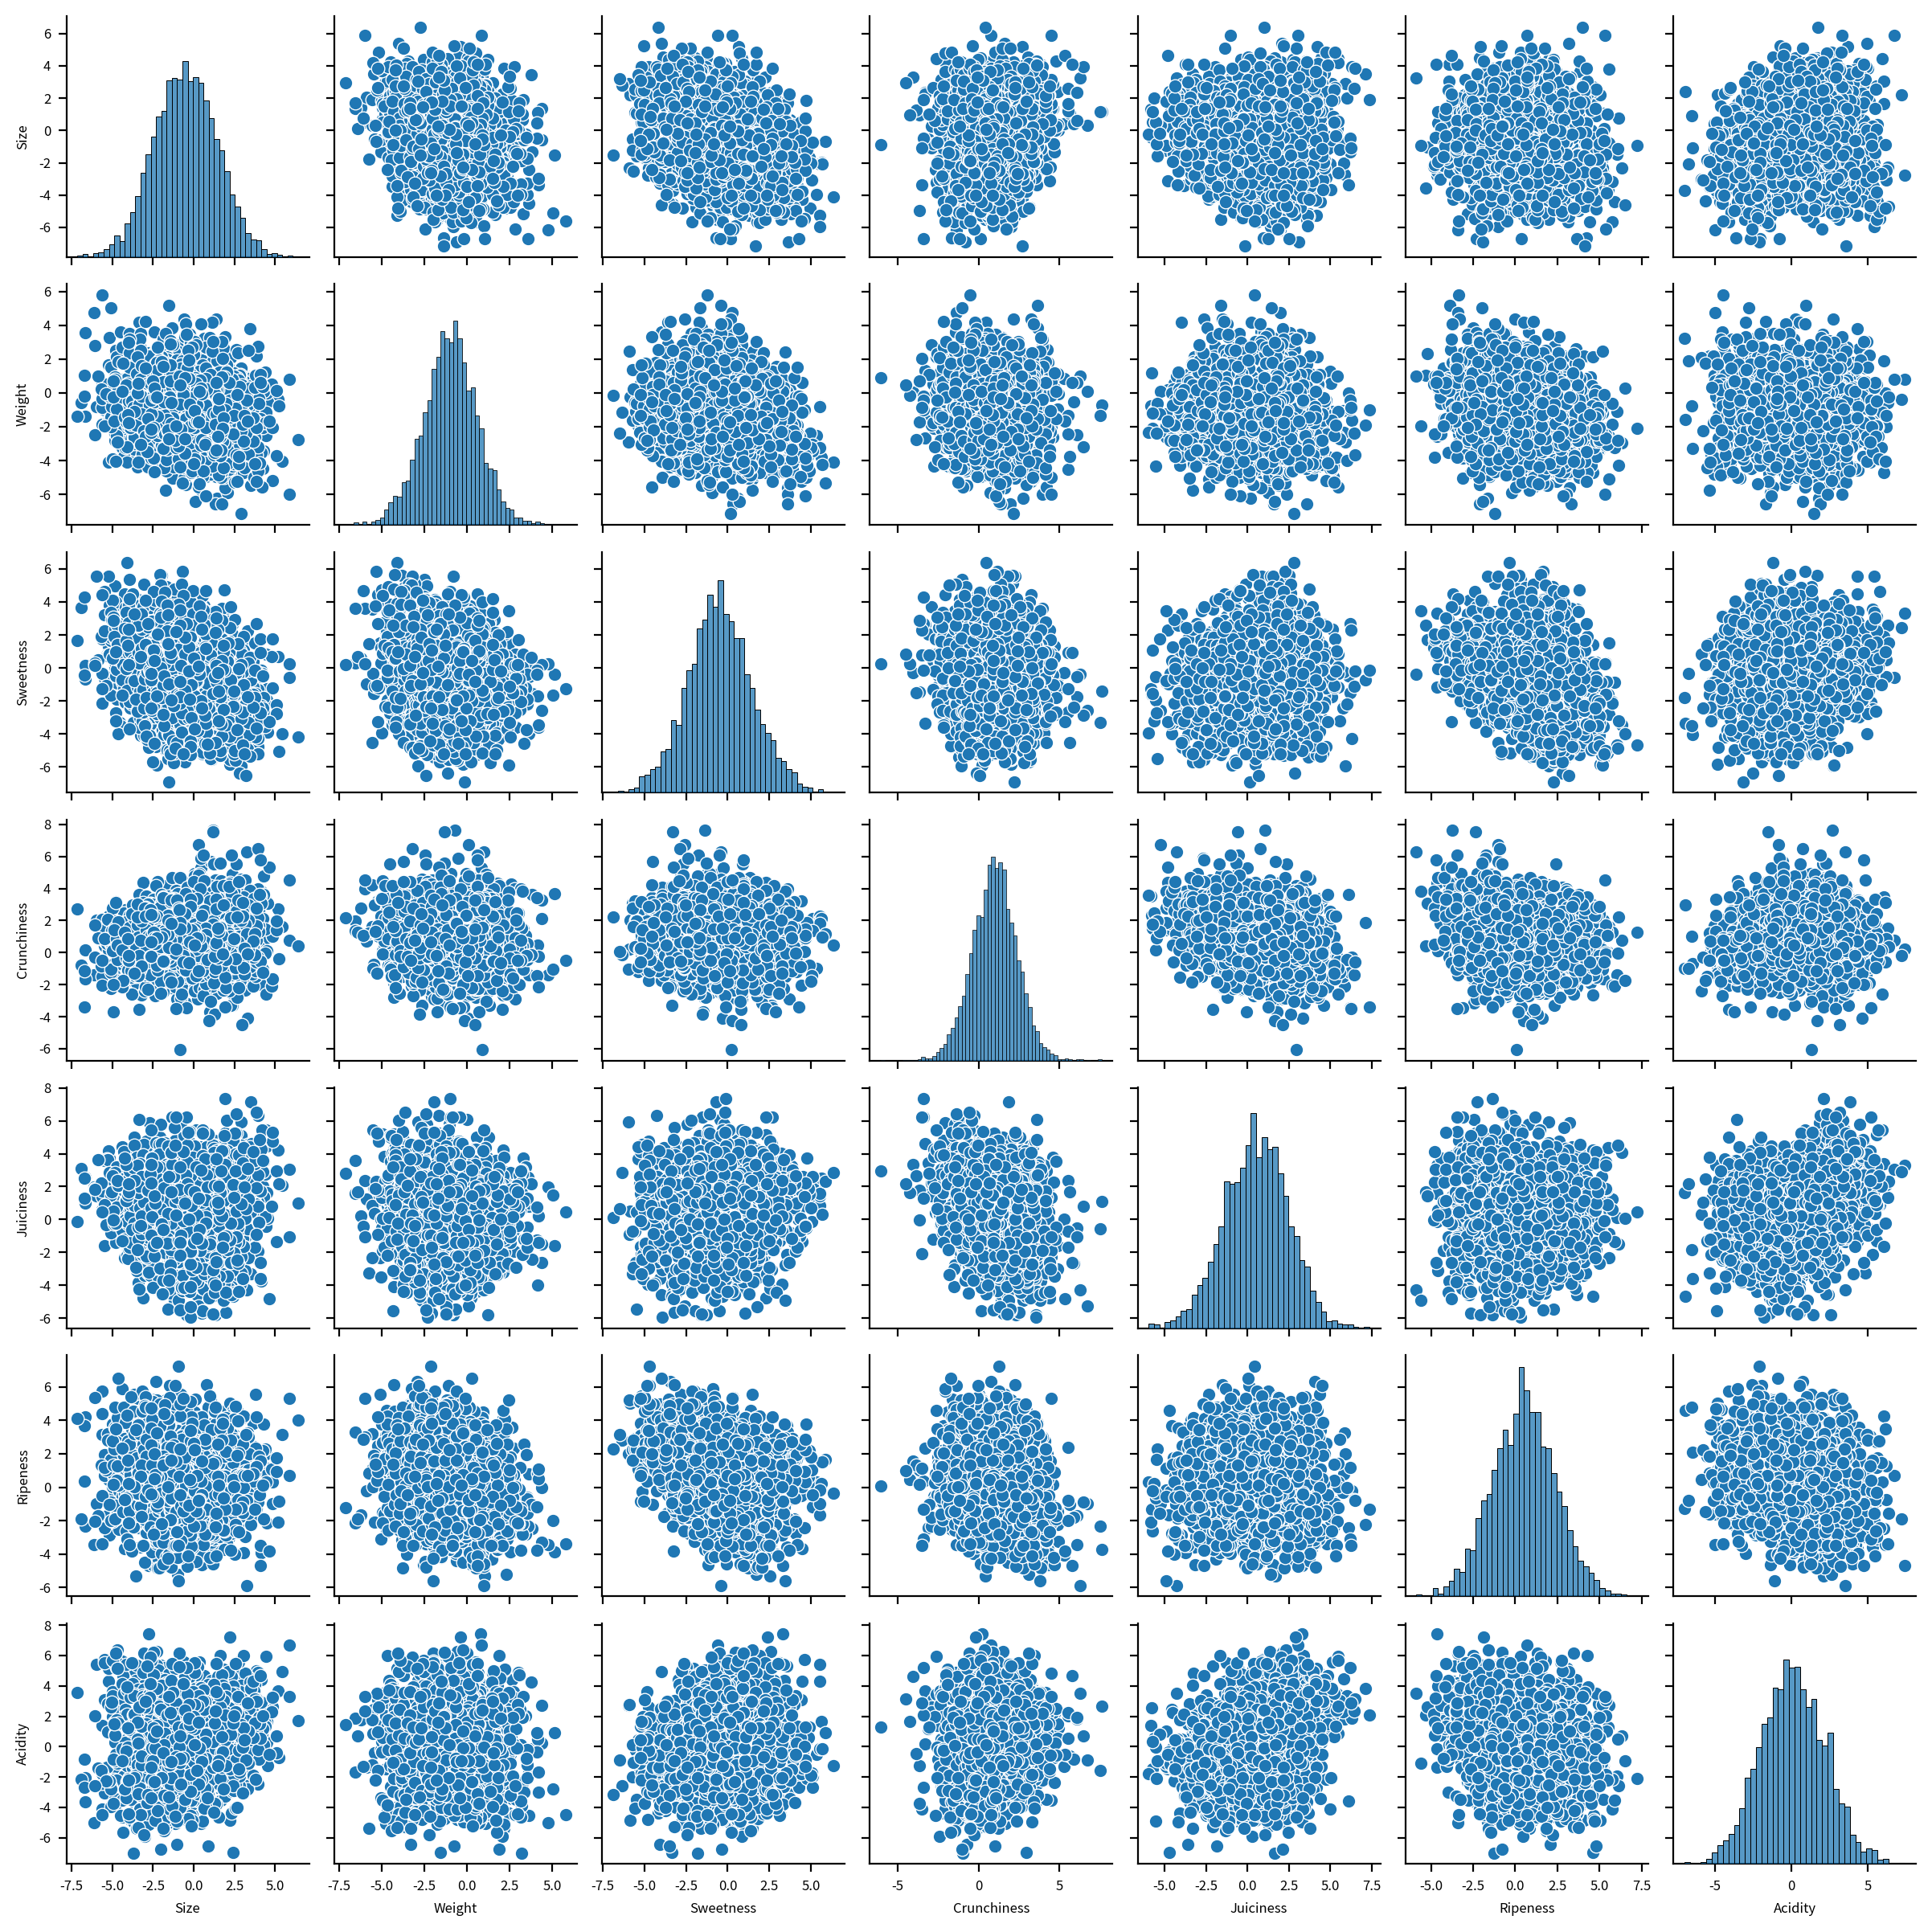

✅ 이상치 요약


,original_skew,log_skew,outliers(|z|>3)
Size,-0.002437,-0.829367,10.0
Weight,0.003102,-0.826672,21.0
Sweetness,0.083850,-0.741892,10.0
Crunchiness,0.000230,-0.795241,29.0
Juiciness,-0.113421,-1.034189,16.0
Ripeness,-0.008764,-0.800417,8.0
Acidity,0.055783,-0.774239,8.0


🎈 상관 분석


,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,Size,Weight,True,True,spearman,-0.144268,4.752499e-20,True,Very Weak
1,Size,Sweetness,True,True,spearman,-0.310476,4.062856e-90,True,Weak
2,Size,Crunchiness,False,True,spearman,0.171818,7.038392e-28,True,Very Weak
3,Size,Juiciness,False,True,spearman,-0.031881,4.378070e-02,True,Very Weak
4,Size,Ripeness,False,True,spearman,-0.154780,7.171387e-23,True,Very Weak
5,Size,Acidity,False,True,spearman,0.209998,4.185775e-41,True,Weak
6,Weight,Sweetness,False,True,spearman,-0.119883,2.802006e-14,True,Very Weak
7,Weight,Crunchiness,True,True,spearman,-0.087117,3.418624e-08,True,Very Weak
8,Weight,Juiciness,True,True,spearman,-0.090611,9.425551e-09,True,Very Weak
9,Weight,Ripeness,False,True,spearman,-0.244340,1.858589e-55,True,Weak


📊 상관 행렬


,Acidity,Crunchiness,Juiciness,Ripeness,Size,Sweetness,Weight
Acidity,1.000000,0.073556,0.230778,-0.194695,0.209998,0.072026,0.030479
Crunchiness,0.073556,1.000000,-0.236538,-0.183677,0.171818,-0.017346,-0.087117
Juiciness,0.230778,-0.236538,1.000000,-0.124169,-0.031881,0.097540,-0.090611
Ripeness,-0.194695,-0.183677,-0.124169,1.000000,-0.154780,-0.254604,-0.244340
Size,0.209998,0.171818,-0.031881,-0.154780,1.000000,-0.310476,-0.144268
Sweetness,0.072026,-0.017346,0.097540,-0.254604,-0.310476,1.000000,-0.119883
Weight,0.030479,-0.087117,-0.090611,-0.244340,-0.144268,-0.119883,1.000000


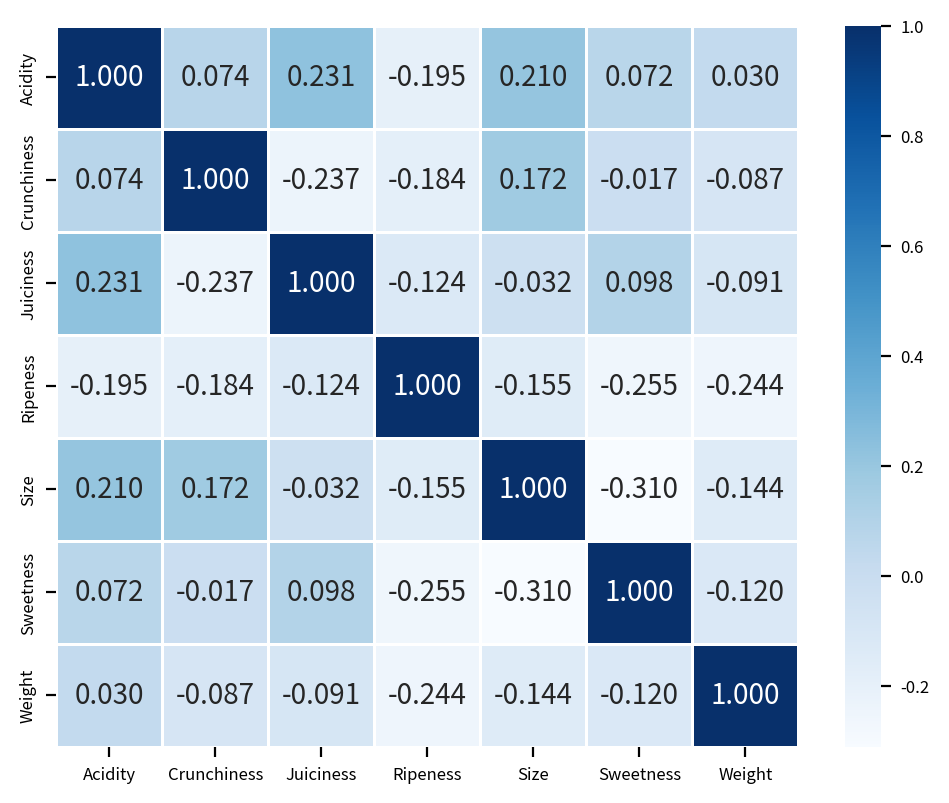

In [60]:
# 데이터 입력
df1=df.filter(my_list)

# 패키지 참조
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr
from itertools import combinations

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 페어플롯으로 형태 확인
width_px=2400
height_px=2400
figsize=(width_px/my_dpi, height_px/my_dpi)

g=sb.pairplot(df1, diag_kind='hist')
g.fig.set_size_inches(figsize)
g.fig.set_dpi(my_dpi)
plt.tight_layout()
plt.show()
plt.close()

# 이상치 요약
print('='*50)
print('✅ 이상치 요약')
print('='*50)
skew_outlier={}
for col in df1.columns:
    temp=df1[col].dropna()
    skew_original=temp.skew()
    z_scores=zscore(temp)
    outlier_count=int(np.sum(np.abs(z_scores)>3))

    data_log=np.log1p(temp-temp.min()+1)
    skew_log=data_log.skew()
    skew_outlier[col]={
        'original_skew':skew_original,
        'log_skew':skew_log,
        'outliers(|z|>3)':outlier_count
    }
skew_outlier_df=DataFrame(skew_outlier).T
display(skew_outlier_df)

# 상관 분석
print('='*50)
print('🎈 상관 분석')
print('='*50)
rows=[]
for a, b in combinations(df1.columns, 2):
    x=df1[a]
    y=df1[b]
    X=sm.add_constant(x)
    model=sm.OLS(y,X).fit()
    reset=linear_reset(model, power=2, use_f=True)
    linearity_ok=reset.pvalue>0.05
    a_flag=skew_outlier_df.loc[a, 'outliers(|z|>3)']>0
    b_flag=skew_outlier_df.loc[b, 'outliers(|z|>3)']>0
    outlier_flag=a_flag or b_flag
    if linearity_ok and not outlier_flag:
        chosen='pearson'
        corr, pval=pearsonr(x, y)
    else:
        chosen='spearman'
        corr, pval=spearmanr(x, y)
    significant=pval<=0.05
    abs_r=abs(corr)
    if abs_r>=0.80:
        strength='Very Strong'
    elif abs_r>=0.60:
        strength='Strong'
    elif abs_r>=0.40:
        strength='Medium'
    elif abs_r>=0.20:
        strength='Weak'
    else:
        strength='Very Weak'
    rows.append({
        'var_a':a,
        'var_b':b,
        'linearity':linearity_ok,
        'outlier_flag':outlier_flag,
        'chosen':chosen,
        'corr':corr,
        'pval':pval,
        'significant':significant,
        'strength':strength
    })
summary_df=DataFrame(rows)
display(summary_df)

# 상관 행렬
print('='*50)
print('📊 상관 행렬')
print('='*50)
vars=sorted(set(summary_df['var_a']).union(summary_df['var_b']))
corr_matrix=DataFrame(np.nan, index=vars, columns=vars)
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a,b]=r
    corr_matrix.loc[b,a]=r
np.fill_diagonal(corr_matrix.values,1)
display(corr_matrix)

# 상관행렬 시각화
width_px=1000
height_px=800
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.heatmap(data=corr_matrix, annot=True, fmt='0.3f', linewidth=0.5, cmap='Blues', annot_kws={'size':10})
plt.tight_layout()
plt.show()
plt.close()

## 🎯미션6. EDA 결과 요약 및 독립변수 선정

## 🎯미션7~9. 로지스틱 회귀 모델, 오즈비, ROC Curve 시각화

데이터 전처리
Quality_0 = good
Quality_1 = bad
Optimization terminated successfully.
         Current function value: 0.514195
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Quality_1   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                            7
Date:                Wed, 17 Dec 2025   Pseudo R-squ.:                  0.2582
Time:                        18:07:36   Log-Likelihood:                -2056.8
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                5.599e-305
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6462      0.061    -10.514      0.000      -0.7

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specif city, TNR)",RAS(auc score),F1_score
0,0.258172,0.74875,0.756869,0.731463,0.234032,0.765968,0.748715,0.743949


,종속변수,독립변수,B(β),표준오차,z,p-value,OR,CI_lower,CI_upper,VIF
0,Quality_1,Size,-0.6495,0.028,-22.993***,0.000,0.522307,0.494415,0.551772,1.296660
1,Quality_1,Weight,-0.2667,0.028,-9.399***,0.000,0.765903,0.725003,0.809110,1.604642
2,Quality_1,Sweetness,-0.5688,0.027,-20.938***,0.000,0.566204,0.537020,0.596975,1.425089
3,Quality_1,Crunchiness,-0.0346,0.030,-1.143,0.253,0.965992,0.910829,1.024495,1.371320
4,Quality_1,Juiciness,-0.4422,0.024,-18.242***,0.000,0.642621,0.613092,0.673572,1.215703
5,Quality_1,Ripeness,0.1267,0.025,5.132***,0.000,1.135076,1.080798,1.192080,1.579338
6,Quality_1,Acidity,0.2941,0.021,13.697***,0.000,1.341918,1.287806,1.398304,1.171249


'Pseudo R²(McFadden) = 0.258, LLR X²(7) = 1431.604, p-value = 0.0000, Accuracy = 0.749, AUC = 0.749'

'Quality_1에 대하여 Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity로 예측하는 로지스틱 회귀분석을 실시한 결과, 모형은 통계적으로 유의(X²(7) = 1431.604, p ≤ 0.05)하였다.'

Size의 오즈비는 0.522(p ≤ 0.05)로, Quality_1 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Weight의 오즈비는 0.766(p ≤ 0.05)로, Quality_1 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Sweetness의 오즈비는 0.566(p ≤ 0.05)로, Quality_1 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Crunchiness의 오즈비는 0.966(p > 0.05)로, Quality_1 발생 odds에 유의하지 않은 영향을 미치는 것으로 나타났다.
Juiciness의 오즈비는 0.643(p ≤ 0.05)로, Quality_1 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Ripeness의 오즈비는 1.135(p ≤ 0.05)로, Quality_1 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.
Acidity의 오즈비는 1.342(p ≤ 0.05)로, Quality_1 발생 odds에 유의미한 영향을 미치는 것으로 나타났다.


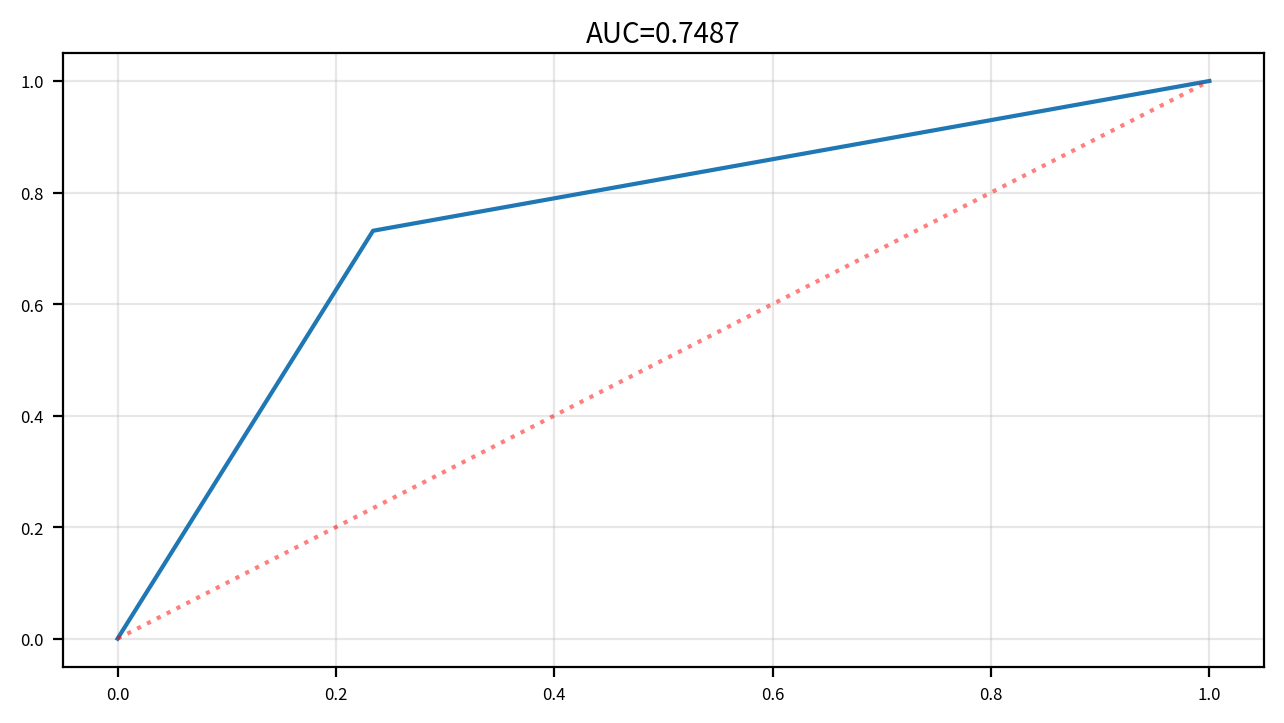

In [61]:
# 패키지 참조
from pandas import DataFrame, get_dummies
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 데이터 전처리             # 필요 시 사용
print('='*50)
print('데이터 전처리')
print('='*50)
mydata=['Quality']              # 명목형 변수 전처리
for j in mydata:
    new_dict={}
    my_unique=df[j].unique()
    for i, v in enumerate(my_unique):
        new_dict.update({v:i})
        print(f'{j}_{i} = {v}')
    df[j]=df[j].map(new_dict)
    df=get_dummies(df, columns=[j], dtype='int', drop_first=True)

# 데이터 입력
yname='Quality_1'          # 범주형 종속 변수 (합/불 등)
my_log=False            # 로그변환 필요시 True로 변경 
# df=origin.copy()
x=df.drop(yname, axis=1)
y=df[yname]
if my_log:
    log_vars=x.columns
    for v in log_vars:
        df[f'log_{v}']=np.log1p(df[v])
    df.drop(columns=log_vars, inplace=True)
x_input=sm.add_constant(df.drop(yname, axis=1))
fit=sm.Logit(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

# 결과보고 함수 정의
def logit_report(fit, data, threshold=0.5):
    yname=fit.model.endog_names
    y_true=data[yname]
    y_pred=fit.predict(fit.model.exog)
    y_pred_fix=(y_pred>=threshold).astype(int)

    cm=confusion_matrix(y_true, y_pred_fix)
    tn, fp, fn, tp=cm.ravel()

    acc=accuracy_score(y_true, y_pred_fix)
    pre=precision_score(y_true, y_pred_fix)
    tpr=recall_score(y_true, y_pred_fix)
    fpr=fp/(fp+tn)
    tnr=1-fpr
    f1=f1_score(y_true, y_pred_fix)
    ras=roc_auc_score(y_true, y_pred_fix)

    cdf=DataFrame({
        '설명력(Pseudo-Rsqe)':[fit.prsquared],
        '정확도(Accuracy)':[acc],
        '정밀도(Precision)':[pre],
        '재현율(Recall, TPR)':[tpr],
        '위양성율(Fallout, FPR)':[fpr],
        '특이성(Specif city, TNR)':[tnr],
        'RAS(auc score)':[ras],
        'F1_score':[f1]
    })

    tbl=fit.summary()
    xnames=[n for n in fit.model.exog_names if n!='const']
    x=data[xnames]
    variables=[]
    vif_dict={
        col:variance_inflation_factor(x.values, i)
        for i, col in enumerate(x.columns)
    }

    for v in tbl.tables[1].data:
        name=v[0].strip()
        if name not in xnames:
            continue
        beta=float(v[1])
        se=float(v[2])
        z=float(v[3])
        p=float(v[4])

        or_val=np.exp(beta)
        ci_low=np.exp(beta-1.96*se)
        ci_high=np.exp(beta+1.96*se)

        stars=(
            '***' if p<0.001 else
            '**' if p<0.01 else
            '*' if p<0.05 else
            ''
        )

        variables.append({
            '종속변수':yname,
            '독립변수':name,
            'B(β)':beta,
            '표준오차':se,
            'z':f'{z:.3f}{stars}',
            'p-value':p,
            'OR':or_val,
            'CI_lower':ci_low,
            'CI_upper':ci_high,
            'VIF':vif_dict.get(name, np.nan)
        })
    
    rdf=DataFrame(variables)

    result_report=(
        f'Pseudo R²(McFadden) = {fit.prsquared:.3f}, '
        f'LLR X²({int(fit.df_model)}) = {fit.llr:.3f}, '
        f'p-value = {fit.llr_pvalue:.4f}, '
        f'Accuracy = {acc:.3f}, '
        f'AUC = {ras:.3f}'
    )

    tpl=(
        '%s에 대하여 %s로 예측하는 로지스틱 회귀분석을 실시한 결과, '
        '모형은 통계적으로 %s(X²(%s) = %.3f, p %s 0.05)하였다.'
    )

    model_report=tpl%(
        yname,
        ', '.join(xnames),
        '유의' if fit.llr_pvalue<=0.05 else '유의하지 않음',
        int(fit.df_model),
        fit.llr,
        '≤' if fit.llr_pvalue<=0.05 else '>'
    )

    variable_reports=[]

    s=(
        '%s의 오즈비는 %.3f(p %s 0.05)로, '
        '%s 발생 odds에 %s 영향을 미치는 것으로 나타났다.'
    )

    for _, row in rdf.iterrows():
        variable_reports.append(
            s%(
                row['독립변수'],
                row['OR'],
                '≤' if row['p-value']<=0.05 else '>',
                row['종속변수'],
                '유의미한' if row['p-value']<=0.05 else '유의하지 않은'
            )
        )
    
    return cdf, rdf, result_report, model_report, variable_reports

# 분석결과 보고
cdf, rdf, r, m, v=logit_report(fit, df)
display(cdf)
display(rdf)
display(r)
display(m)
for i in v:
    print(i)

# AUC 시각화
y_true=df[yname]
y_prob=fit.predict(fit.model.exog)
y_pred=(y_prob>=0.5).astype(int)
ras=roc_auc_score(y_true, y_pred)
roc_fpr, roc_tpr, thresholds=roc_curve(y_true, y_pred)
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
ax.grid(True, alpha=0.3)
ax.set_title(f'AUC={ras:.4f}', fontsize=10, pad=4)
plt.tight_layout()
plt.show()
plt.close()

# 데이터 입력을 통한 예측 (필요시 사용)
# print('='*50)
# print('데이터 예측')
# print('='*50)
# myinput=[]
# for i, v in enumerate(x.columns):
#     myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
# mydict={}
# for i in range(0,len(x.columns)):
#     mydict.update({x.columns[i]:float(myinput[i].strip())})
# x_new=DataFrame([mydict])
# x_new_input=sm.add_constant(x_new, has_constant='add')
# myresult=fit.predict(x_new_input)
# print(myresult)

## 🎯미션10. 예시 데이터를 통한 모델의 판단

In [62]:
# 데이터 입력을 통한 예측
print('='*50)
print('데이터 예측 (size=0)')
print('='*50)
myinput=[]
for i, v in enumerate(x.columns):
    myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
mydict={}
for i in range(0,len(x.columns)):
    mydict.update({x.columns[i]:float(myinput[i].strip())})
x_new=DataFrame([mydict])
x_new_input=sm.add_constant(x_new, has_constant='add')
myresult=fit.predict(x_new_input)
print(myresult)

# 데이터 입력을 통한 예측
print('='*50)
print('데이터 예측 (size=1)')
print('='*50)
myinput=[]
for i, v in enumerate(x.columns):
    myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
mydict={}
for i in range(0,len(x.columns)):
    mydict.update({x.columns[i]:float(myinput[i].strip())})
x_new=DataFrame([mydict])
x_new_input=sm.add_constant(x_new, has_constant='add')
myresult=fit.predict(x_new_input)
print(myresult)

데이터 예측 (size=0)


ValueError: could not convert string to float: ''